# Assigment 4 - Breast Cancer Data Analysis and Streamlit App

#### Norma Parra - c0914632

In [11]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from sklearn.feature_selection import SelectKBest, f_classif

## Dataset Acquisition and Preparation

In [12]:
# download the dataset from sklearn
data = load_breast_cancer()

In [13]:
# Print the content of the dataset
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [14]:
# Description of the dataset
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

There is not missing values in this dataset, the feature are already numeric values

### Preprocesing

In [15]:
# Extract features (X) and target labels (y)
X = data.data
y = data.target

# Display dataset information
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (569, 30)
Target vector shape: (569,)


In [16]:
print("Feature names:", data.feature_names)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [17]:
print("Target:",data.target_names)

Target: ['malignant' 'benign']


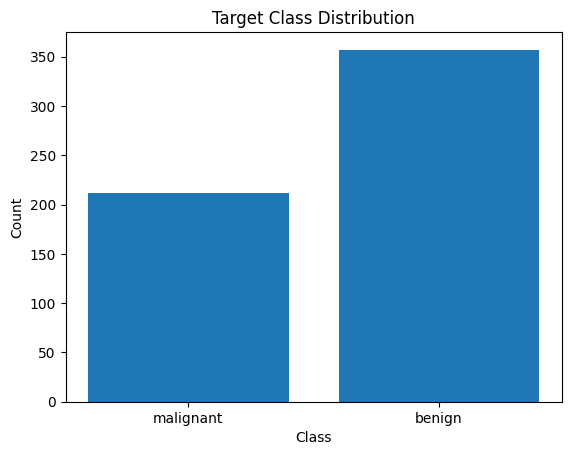

In [18]:
# Plot Classes distribution
classes, counts = np.unique(y, return_counts=True)
plt.bar(data.target_names, counts)
plt.title("Target Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [19]:
# split the data in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Feature Selection
Implement feature selection using methods like SelectKBest from sklearn.feature_selection

In [20]:
# Select features according to the k highest scores
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Features selected
selected_features = [data.feature_names[i] for i in selector.get_support(indices=True)]
print("Selected Features:", selected_features)

Selected Features: [np.str_('mean radius'), np.str_('mean perimeter'), np.str_('mean area'), np.str_('mean concavity'), np.str_('mean concave points'), np.str_('worst radius'), np.str_('worst perimeter'), np.str_('worst area'), np.str_('worst concavity'), np.str_('worst concave points')]


In [21]:
X_train_selected.shape

(426, 10)

In [22]:
X_test_selected.shape

(143, 10)

## Normalize the data after feature selection

In [23]:
# standardize the features 
sc=StandardScaler()
X_train_selected_sc=sc.fit_transform(X_train_selected)
X_test_selected_sc=sc.transform(X_test_selected)

## Grid Search CV for Model Tuning

In [ ]:
# GridSearch CV to optimize the parameters of ANN model MLPClassifier from sklearn.neural_network
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the parameter grid to search
param_grid = {
    #'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
     'hidden_layer_sizes': [
            (50,), (100,),
            (50, 50), (100, 50),
            (50, 25, 10), (100, 50, 25)
      ],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'batch_size': [32, 64, 128],
    'max_iter': [500]
}

# Define ANN model as MLPClassifier
mlp = MLPClassifier(random_state=42)

# Set up Grid Search CV 
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5,n_jobs=-1, scoring='accuracy', verbose=2)

### Find the best hyperparameters

In [ ]:
# Train the model with cross-validation to find the best hyperparameters:

# Fit the Grid Search to the data
grid_search.fit(X_train_selected_sc, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


c:\Users\root\Breast_Cancer\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'batch_size': [32, 64, 128],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50), (50, 25, 10),
                                                (100, 50, 25)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [500], 'solver': ['adam', 'sgd']},
             scoring='accuracy', verbose=2)

In [26]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 128, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
Best Cross-Validation Accuracy: 0.9624076607387142


## Train and Evaluate ANN Model

In [27]:
# Get the best model
best_model = grid_search.best_estimator_

# Train the ANN model with best parameters
best_model.fit(X_train_selected_sc, y_train)

# Evaluate the model
y_pred = best_model.predict(X_test_selected_sc)
train_accuracy = best_model.score(X_train_selected_sc, y_train)
test_accuracy = best_model.score(X_test_selected_sc, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print(classification_report(y_test, y_pred))

Train Accuracy: 0.971830985915493
Test Accuracy: 0.9790209790209791
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



c:\Users\root\Breast_Cancer\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
# Needed in colab
# !pip install joblib

## Save Models and Selected Features

In [31]:
import joblib

# Save the scaler
joblib.dump(sc, '../Model/scaler.pkl')

# Save the trained model
joblib.dump(best_model, '../Model/best_mlp_model.pkl')

# Save the selected features
joblib.dump(selected_features, '../Model/selected_features.pkl')

['../Model/selected_features.pkl']